In [1]:
import acquire
import prepare
import explore
import scipy.stats as stats
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

Planning:
-Create a readme file w/data dictionary
-Clean and prepare data
-Create functions for importing
-Set and test two hypothesis and run tests to fail or reject them
-Create a baseline accuracy model and train 3 different classification models
-Evaluate the test data with the best performing model
-Create a CSV


Executive Summary:
-Exploring the data lead me to find the features that were effecting churn the most.
-Testing with 3 different models Random Forest, Decsion Tree, and Logistic Regression showed that the Random Forest model performed the best with 81% accuracy.
-The Random Forest was better than the baseline which was 73%.


Acquire

In [2]:
#bringing in the dataframe
df = acquire.get_new_telco_churn_data()

In [3]:
#show a sample of the dataframe
df.sample(3)

,payment_type_id,payment_type,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,...,contract_type_id,paperless_billing,payment_type_id,monthly_charges,total_charges,churn,internet_service_type_id,internet_service_type,contract_type_id,contract_type
1450,1,Electronic check,4299-SIMNS,Male,0,No,No,9,Yes,Yes,...,1,Yes,1,81.15,784.45,No,2,Fiber optic,1,Month-to-month
4119,2,Mailed check,6729-FZWSY,Male,0,No,No,67,Yes,No,...,2,Yes,2,19.45,1195.95,No,3,None,2,One year
3252,4,Credit card (automatic),4918-QLLIW,Male,0,No,No,3,Yes,No,...,1,No,4,53.40,188.7,Yes,1,DSL,1,Month-to-month


In [4]:
#shape of data frame showing rows and columns
df.shape

(7043, 27)

In [5]:
#getting the data type and columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   payment_type_id           7043 non-null   int64  
 1   payment_type              7043 non-null   object 
 2   customer_id               7043 non-null   object 
 3   gender                    7043 non-null   object 
 4   senior_citizen            7043 non-null   int64  
 5   partner                   7043 non-null   object 
 6   dependents                7043 non-null   object 
 7   tenure                    7043 non-null   int64  
 8   phone_service             7043 non-null   object 
 9   multiple_lines            7043 non-null   object 
 10  internet_service_type_id  7043 non-null   int64  
 11  online_security           7043 non-null   object 
 12  online_backup             7043 non-null   object 
 13  device_protection         7043 non-null   object 
 14  tech_sup

Take Away:
The sql data has 7043 rows and 27 columns
There are duplicates

Prepare

In [6]:
#Check the value counts for churn
churned_df = df[df['churn']=='Yes']
explore.value_counts(churned_df)

payment_type
Electronic check             1071
Mailed check                  308
Bank transfer (automatic)     258
Credit card (automatic)       232
Name: payment_type, dtype: int64
-------------
gender
Female    939
Male      930
Name: gender, dtype: int64
-------------
senior_citizen
0    1393
1     476
Name: senior_citizen, dtype: int64
-------------
partner
No     1200
Yes     669
Name: partner, dtype: int64
-------------
dependents
No     1543
Yes     326
Name: dependents, dtype: int64
-------------
phone_service
Yes    1699
No      170
Name: phone_service, dtype: int64
-------------
multiple_lines
Yes                 850
No                  849
No phone service    170
Name: multiple_lines, dtype: int64
-------------
online_security
No                     1461
Yes                     295
No internet service     113
Name: online_security, dtype: int64
-------------
online_backup
No                     1233
Yes                     523
No internet service     113
Name: online_backup,

Take Away:
Streaming_movies, Streaming_TV, Multiple_lines, and gender can be removed to clean up the data.

In [7]:
#Cleaning the data
df = prepare.prep_telco_data(df)

In [8]:
#show a sample
df.sample(3).T

,1912,6468,6976
payment_type,Electronic check,Credit card (automatic),Electronic check
customer_id,6365-MTGZX,0771-CHWSK,9027-TMATR
senior_citizen,0,0,0
partner,0,0,1
dependents,0,0,0
tenure_in_months,24,66,43
phone_service,1,1,1
online_security,0,1,1
online_backup,0,1,0
device_protection,0,1,1


In [9]:
#check the shape of the new dataframe
df.shape

(7032, 17)

In [10]:
#split the data
train, validate, test = prepare.telco_split(df)

In [11]:
#check the shape of the new data
train.shape, validate.shape, test.shape

((3937, 17), (1688, 17), (1407, 17))

In [12]:
train.head(3).T

,5399,2876,659
payment_type,Mailed check,Electronic check,Mailed check
customer_id,0831-JNISG,1963-SVUCV,0611-DFXKO
senior_citizen,0,0,0
partner,1,0,1
dependents,1,0,0
tenure_in_months,71,1,20
phone_service,1,1,1
online_security,0,0,0
online_backup,0,0,0
device_protection,0,0,0


Takeaway:
-Dropped nulls and uneccessary columns
-Split the data to get it ready for testing

Explore

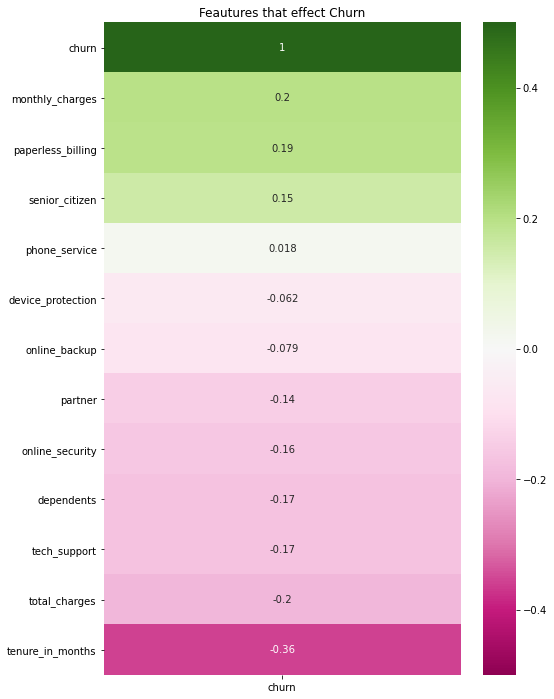

In [13]:
# Use the popular heat map to show churn
plt.figure(figsize=(8,12))
churn_heatmap = sns.heatmap(train.corr()[['churn']].sort_values(by='churn', ascending=False), cmap='PiYG', vmin=-.5, vmax=.5, annot=True)
churn_heatmap.set_title('Feautures that effect Churn')
plt.show()

Some of the lowest features effecting churn are phone_service, device_protection and online_backup

#Going to explore how paperless billing, partners, and monthly charges effect churn
Use a $chi^2$ test to see if paperless billing effects churn\ ${H_0}$ : Paperless billing has no effect on customer churn\ ${H_a}$ : Paperless billing does have an effect on churn

In [14]:
# setting the alpha 
alpha = 0.05

# create a crosstab
observed = pd.crosstab(train.churn, train.paperless_billing)

# chi2 test
chi2, p, degf, expected = stats.chi2_contingency(observed)

# results
print('Observed\n')
print(observed.values)
print('---\nExpected\n')
print(expected.astype(int))
print('---\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4}')


Observed

[[1382 1507]
 [ 276  772]]
---
Expected

[[1216 1672]
 [ 441  606]]
---

chi^2 = 144.9512
p     = 2.201e-33


In [15]:
if p < alpha:
    print('We reject the null hypothesis')
else:
    print('We fail to reject the null hypothesis')

We reject the null hypothesis


Using another chi2 we'll check for correlation of  partner and churn.\ ${H_0}$ : Having a partner does not effect customer churn\ ${H_a}$ : Having a partner does effect customer churn

In [16]:
 #set the alpha
alpha = 0.05

# create a crosstab
observed = pd.crosstab(train.churn, train.partner)

#chi2 test
chi2, p, degf, expected = stats.chi2_contingency(observed)

# take a look at our results
print('Observed\n')
print(observed.values)
print('---\nExpected\n')
print(expected.astype(int))
print('---\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:}')

Observed

[[1376 1513]
 [ 666  382]]
---
Expected

[[1498 1390]
 [ 543  504]]
---

chi^2 = 77.4423
p     = 1.3665799090892278e-18


In [17]:
if p < alpha:
    print('We reject the null hypothesis')
else:
    print('We fail to reject the null hypothesis')

We reject the null hypothesis


Using a one sample, one tailed ttest, were going to compare the mean of monthly charages of churned customers to overall customers.
\ ${H_0}$: Mean monthly charges for churned customers = Mean  monthly charges for all customers.\ ${H_a}$: Mean  monthly charges for churned customers > Mean monthly charges for all customers.

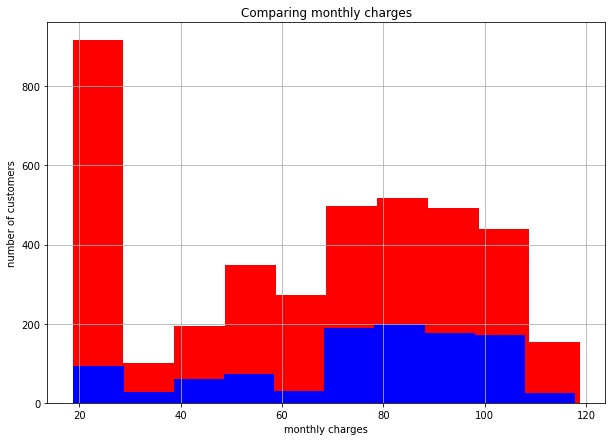

In [18]:
# compare the monthly charges
plt.figure(figsize=(10,7))
train.monthly_charges.hist(color='r')
train[train['churn']==1].monthly_charges.hist(color='blue')
plt.xlabel('monthly charges')
plt.ylabel('number of customers')
plt.title('Comparing monthly charges')
plt.show()

In [19]:
# assign the ttest variable 
churn_sample = train[train.churn == 1].monthly_charges
overall_mean = train.monthly_charges.mean()

# calculate t and p 
t, p = stats.ttest_1samp(churn_sample, overall_mean)

# Results
t, p/2, alpha

(12.897478777164558, 9.909789308393289e-36, 0.05)

In [20]:
if (p/2 < alpha) & (t > 0):
    print("We reject the null hypothesis, monthly charges do effect churn.")
else:
    print("We fail to reject the null hypothesis")

We reject the null hypothesis, monthly charges do effect churn.


Takeaway:
Contract_type, dependents, internet_service_type, payment_type, and senior_citizen all effect churn.

The numbers show that paperless billing, monthly charges, and having a partner all are associated to churn.

Models

In [21]:
# Keeping the features that effect churn the most and dropping the others
features = ['payment_type', 'senior_citizen', 'contract_type',
           'internet_service_type', 'dependents', 'paperless_billing',
           'monthly_charges', 'partner', 'churn']

# updating the dataframe
train = train[features]
validate = validate[features]
test = test[features]

In [22]:
# create dummies for flag columns 
train = prepare.create_dummies(train)
validate = prepare.create_dummies(validate)
test = prepare.create_dummies(test)

In [23]:
# check the new shape
train.shape, validate.shape, test.shape

((3937, 13), (1688, 13), (1407, 13))

In [24]:
#check a sample
train.sample(3).T

,5452,4011,5436
senior_citizen,0.0,0.00,0.00
dependents,1.0,0.00,1.00
paperless_billing,0.0,1.00,0.00
monthly_charges,20.5,20.35,20.45
partner,0.0,0.00,0.00
churn,0.0,0.00,0.00
Credit card (automatic),0.0,1.00,1.00
Electronic check,0.0,0.00,0.00
Mailed check,1.0,0.00,0.00
DSL,0.0,0.00,0.00


Baseline

In [25]:
# checking value counts for the baseline
train.churn.value_counts()

0    2889
1    1048
Name: churn, dtype: int64

In [26]:
# baseline is 0, most common
train['baseline'] = 0
train.sample().T

,604
senior_citizen,0.0
dependents,0.0
paperless_billing,0.0
monthly_charges,78.2
partner,1.0
churn,0.0
Credit card (automatic),0.0
Electronic check,1.0
Mailed check,0.0
DSL,0.0


In [27]:
#classification report
print(classification_report(train.churn, train.baseline))

              precision    recall  f1-score   support

           0       0.73      1.00      0.85      2889
           1       0.00      0.00      0.00      1048

    accuracy                           0.73      3937
   macro avg       0.37      0.50      0.42      3937
weighted avg       0.54      0.73      0.62      3937



Baseline shows 73% accuracy

In [28]:
# baseline is no longer neccessary
train.drop(columns = 'baseline', inplace=True)

In [29]:
# verify my features are the correct data types for my models
train.dtypes

senior_citizen               int64
dependents                   int64
paperless_billing            int64
monthly_charges            float64
partner                      int64
churn                        int64
Credit card (automatic)      uint8
Electronic check             uint8
Mailed check                 uint8
DSL                          uint8
Fiber optic                  uint8
One year                     uint8
Two year                     uint8
dtype: object

In [30]:
# asssign x and y

x_train = train.drop(columns = 'churn')
y_train = train.churn

x_validate = validate.drop(columns = 'churn')
y_validate = validate.churn

x_test = test.drop(columns = 'churn')
y_test = test.churn

Logistic Regression Model

In [33]:
# assign a variable 
logit1 = LogisticRegression(C=1, class_weight={0:1, 1:99}, random_state=123, intercept_scaling=1, solver='lbfgs')

print('Model 1 is a', logit1)
print('----------')

# fit 
logit1.fit(x_train, y_train)

#  prediction
y_pred = logit1.predict(x_train)

# assign variables 
tn, fp, fn, tp = confusion_matrix(y_train, y_pred).ravel()
print("True Positives", tp)
print("False Positives", fp)
print("False Negatives", fn)
print("True Negatives", tn)

print("-------------")

accuracy = (tp + tn) / (tp + tn + fp + fn)
recall = tp / (tp + fn)
precision = tp / (tp + fp)

print("Accuracy is", accuracy)
print("Recall is", recall)
print("Precision is", precision)

print("-------------")

# classification report
print(classification_report(y_train, y_pred))

print("-------------")


print('Logistic Regression accuracy on training data: {:.2f}'
     .format(logit1.score(x_train, y_train)))
print('Logistic Regression accuaracy on validate data: {:.2f}'
     .format(logit1.score(x_validate, y_validate)))

Model 1 is a LogisticRegression(C=1, class_weight={0: 1, 1: 99}, random_state=123)
----------
True Positives 1047
False Positives 2564
False Negatives 1
True Negatives 325
-------------
Accuracy is 0.34848869697739393
Recall is 0.9990458015267175
Precision is 0.2899473829963999
-------------
              precision    recall  f1-score   support

           0       1.00      0.11      0.20      2889
           1       0.29      1.00      0.45      1048

    accuracy                           0.35      3937
   macro avg       0.64      0.56      0.33      3937
weighted avg       0.81      0.35      0.27      3937

-------------
Logistic Regression accuracy on training data: 0.35
Logistic Regression accuaracy on validate data: 0.35


Decision Tree Model

In [34]:
# create the decision tree
dt1 = DecisionTreeClassifier(max_depth=4, random_state=123)

print('Model 2 is a', dt1)
print('----------')

# fit the model
dt1 = dt1.fit(x_train, y_train)

# prediction 
y_pred = dt1.predict(x_train)

# assign variables 
tn, fp, fn, tp = confusion_matrix(y_train, y_pred).ravel()
print("True Positives", tp)
print("False Positives", fp)
print("False Negatives", fn)
print("True Negatives", tn)

print("-------------")

accuracy = (tp + tn) / (tp + tn + fp + fn)
recall = tp / (tp + fn)
precision = tp / (tp + fp)

print("Accuracy is", accuracy)
print("Recall is", recall)
print("Precision is", precision)

print("-------------")

# classification report
print(classification_report(y_train, y_pred))

print("-------------")

print('Decision Tree accuracy on training data: {:.2f}'
      .format(dt1.score(x_train, y_train)))
print('Decision Tree accuracy on validate data: {:.2f}'
      .format(dt1.score(x_validate, y_validate)))

Model 2 is a DecisionTreeClassifier(max_depth=4, random_state=123)
----------
True Positives 448
False Positives 280
False Negatives 600
True Negatives 2609
-------------
Accuracy is 0.7764795529591059
Recall is 0.42748091603053434
Precision is 0.6153846153846154
-------------
              precision    recall  f1-score   support

           0       0.81      0.90      0.86      2889
           1       0.62      0.43      0.50      1048

    accuracy                           0.78      3937
   macro avg       0.71      0.67      0.68      3937
weighted avg       0.76      0.78      0.76      3937

-------------
Decision Tree accuracy on training data: 0.78
Decision Tree accuracy on validate data: 0.78


In [ ]:
Random Forest Model

In [35]:
# create rainforest model
rf1 = RandomForestClassifier(bootstrap=True,
                            class_weight=None, 
                            criterion='gini',
                            min_samples_leaf=2,
                            max_depth=8,
                            random_state=123                           
                           )

print('Model 3 is a', rf1)
print("-------------")

# fit the model
rf1.fit(x_train, y_train)

# prediction
y_pred = rf1.predict(x_train)

# assign variables
tn, fp, fn, tp = confusion_matrix(y_train, y_pred).ravel()
print("True Positives", tp)
print("False Positives", fp)
print("False Negatives", fn)
print("True Negatives", tn)

print("-------------")

accuracy = (tp + tn) / (tp + tn + fp + fn)
recall = tp / (tp + fn)
precision = tp / (tp + fp)

print("Accuracy is", accuracy)
print("Recall is", recall)
print("Precision is", precision)

print("-------------")

# classification report
print(classification_report(y_train, y_pred))
y_pred_proba = logit1.predict_proba(x_train)

print("-------------")

print('Random forest accuracy on training data: {:.2f}'
     .format(rf1.score(x_train, y_train)))
print('Random forest accuracy on validate data: {:.2f}'
     .format(rf1.score(x_validate, y_validate)))

Model 3 is a RandomForestClassifier(max_depth=8, min_samples_leaf=2, random_state=123)
-------------
True Positives 559
False Positives 261
False Negatives 489
True Negatives 2628
-------------
Accuracy is 0.809499618999238
Recall is 0.5333969465648855
Precision is 0.6817073170731708
-------------
              precision    recall  f1-score   support

           0       0.84      0.91      0.88      2889
           1       0.68      0.53      0.60      1048

    accuracy                           0.81      3937
   macro avg       0.76      0.72      0.74      3937
weighted avg       0.80      0.81      0.80      3937

-------------
Random forest accuracy on training data: 0.81
Random forest accuracy on validate data: 0.79


Best Model:
The Random Forest Model is the the best with 81% accuracy.

In [36]:
# Testing the Random Forest Model
print('Random Forest accuracy on test data: {:.2f}'
     .format(rf1.score(x_test, y_test)))

Random Forest accuracy on test data: 0.75


Takeaway:
-The Random Forest Model gave the best accuracy with 75% on the test set
-The models werent over fit
-The worst model accuracy was from the Logistic Regression Model

Create a CSV

In [37]:

# concat train, validate, and test dataframe
df_telco = pd.concat([train, validate, test], axis=0)

# assign a variable to  customer_id column 
customer_ids = df['customer_id']

# drop the churn column 
df_telco_data = df_telco.drop(columns=['churn'])

#  predictions for each customer
prediction_of_churn = pd.DataFrame({'churn_prediction' : rf1.predict(df_telco_data)})

# predictions for each customer's probability of churn
churn_probability = pd.DataFrame({'churn_probability': rf1.predict_proba(df_telco_data)[:,1]})

# combine the dataframes
data = [customer_ids, churn_probability, prediction_of_churn]

# concatenate the dataframes
customer_churn = pd.concat(data, axis=1)

In [38]:
customer_churn.head()

,customer_id,churn_probability,churn_prediction
0,0030-FNXPP,0.007426,0.0
1,0031-PVLZI,0.448979,0.0
2,0098-BOWSO,0.450628,0.0
3,0107-WESLM,0.007376,0.0
4,0114-RSRRW,0.290747,0.0


In [39]:
# export to csv file
customer_churn.to_csv('predictions.csv')

Conclusion:
-The Random Forest Model performed the best on all of the data sets.

What we should do:
-Offer discounted services for 6 months to keep customers longer
-Offer incentives toward targeted churned customers directed toward the top features for churn
-Ask customers to take a survey for things that would g